<div style="text-align: center;">
     <strong<p align="center">MODELO REGRESSIVO PARA DADOS DE CONTAGEM</po</strong>
</div>
<div style="text-align: center;">
     <strong<p align="center"> <span style="font-family:Comic Sans MS; color:red">MODELO POISSON X Modelo Binomial Negativo (POISSON GAMA)</span> </po</strong>
</div>

### Contextualização:

Um estudo foi conduzido para investigar a influência dos aspectos culturais na propensão à corrupção, focando no comportamento dos diplomatas em relação ao estacionamento nas proximidades da sede das Nações Unidas, localizada em Manhattan, Nova York. Até 2002, a imunidade diplomática isentava os diplomatas da ONU de penalidades relacionadas a infrações de estacionamento, limitando as consequências de suas ações às normas culturais vigentes. No entanto, a partir de 2002, as autoridades passaram a ter o direito de confiscar as placas diplomáticas dos infratores, alterando assim o regime de aplicação das penas. Como resultado, as infrações de estacionamento não pagas diminuíram drasticamente. Aqueles que costumavam estacionar de forma irregular passaram a evitar essa prática, enquanto aqueles que já respeitavam as regras de estacionamento continuaram a fazê-lo.
- Rereferência:
     - Fisman, R.; Miguel, E. Corruption, Norms, and Legal Enforcement: Evidence From  Diplomatic Parking Ticket
     - Journal of Political Economy, v. 15, n. 6, p. 1020-1048, 2007.
     - Disponível em: https://www.journals.uchicago.edu/doi/abs/10.1086/527495


**Perguntas**:

1. Qual seria a quantidade média esperada de violações de trânsito para um país cujo corpo diplomático seja composto por X1 membros, considerando o período anterior à vigência da lei e cujo índice de corrupção seja igual a X2?

2. Qual seria a quantidade média esperada de violações de trânsito para o mesmo país, porém agora considerando a vigência da lei?

3. Aspectos culturais influenciam uma maior ou menor propensão à corrupção?

Para isso, serão construídos **Modelos de Regressão para Dados de Contagem**: <span style="font-family:Comic Sans MS; color:red">**modelo preditivo Poisson**</span> e <span style="font-family:Comic Sans MS; color:red">**modelo preditivo Binomial Negativo**</span>.
- Por que utilizar **Modelos de Regressão para Dados de Contagem**?
  - O objetivo aqui é analisar o comportamento de determinada <span style="font-family:Comic Sans MS; color:blue">**variável dependente**</span> (comumente chamada de Y), em função de <span style="font-family:Comic Sans MS; color:red">**variáveis preditoras**</span> (comumente chamadas de X). A **variável dependente** esperada é da forma <span style="font-family:Comic Sans MS; color:brown">**quantitativa**</span>, com <span style="font-family:Comic Sans MS; color:purple">**valores discretos**</span>, <span style="font-family:Comic Sans MS; color:lime">**não negativos**</span>, <span style="font-family:Comic Sans MS; color:pink">**para uma determinada exposição**</span>.

In [6]:
# Instalação dos pacotes

!pip install pandas
!pip install numpy
!pip install -U seaborn
!pip install matplotlib
!pip install plotly
!pip install scipy
!pip install statsmodels
!pip install scikit-learn
!pip install statstests

In [1]:
# Importação dos pacotes

import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
from math import exp, factorial # funções matemáticas 'exp' e 'factorial'
import statsmodels.api as sm # estimação de modelos
import statsmodels.formula.api as smf # estimação de modelos de contagem
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP,ZeroInflatedPoisson
# pacote acima para a estimação dos modelos ZINB e ZIP, respectivamente
from statsmodels.discrete.discrete_model import NegativeBinomial, Poisson
# pacote anterior para a realização do teste de Vuong
from scipy import stats # estatística chi2
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos

import warnings
warnings.filterwarnings('ignore')

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


<div style="text-align: center;">
     <strong<p align="center">REGRESSÃO PARA DADOS DE CONTAGEM</po</strong>
</div>


In [2]:
# CARREGAMENTO DA BASE DE DADOS 'corruption'
df_corruption = pd.read_csv('corruption.csv', delimiter=',')

labels = '''
VARIÁVEIS:      
"violation" é a variável Y (contagem): quantidade de violações de trânsito. É uma variável quantitativa, discreta(inteiro), não negativa(inclui o zero) e para dada exposição (por mês)                                             
"post": "no" antes do enforcement legal                                   
"post": "yes" após o enforcement legal                                    
"staf": corpo diplomático                                                 
"corruption": indicador de corrupção. Índice da transparência Internacional. Quanto maior o índice, pior é a classificação do país.  
'''
print(labels)
print("\n\n", df_corruption)


VARIÁVEIS:      
"violation" é a variável Y (contagem): quantidade de violações de trânsito. É uma variável quantitativa, discreta(inteiro), não negativa(inclui o zero) e para dada exposição (por mês)                                             
"post": "no" antes do enforcement legal                                   
"post": "yes" após o enforcement legal                                    
"staf": corpo diplomático                                                 
"corruption": indicador de corrupção. Índice da transparência Internacional. Quanto maior o índice, pior é a classificação do país.  



                   country code  violations  staff post  corruption
0                  Angola  AGO          50      9   no    1.047506
1                  Angola  AGO           1      9  yes    1.047506
2                 Albania  ALB          17      3   no    0.921079
3                 Albania  ALB           0      3  yes    0.921079
4    United Arab Emirates  ARE           0      3   no 

In [3]:
# Características das variáveis do dataset
df_corruption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     298 non-null    object 
 1   code        298 non-null    object 
 2   violations  298 non-null    int64  
 3   staff       298 non-null    int64  
 4   post        298 non-null    object 
 5   corruption  298 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 14.1+ KB


In [4]:
# Estatísticas univariadas
df_corruption.describe()

,violations,staff,corruption
count,298.000000,298.000000,298.000000
mean,6.496644,11.805369,0.013641
std,18.210377,11.079558,1.012474
min,0.000000,2.000000,-2.582988
25%,0.000000,6.000000,-0.415147
50%,0.000000,9.000000,0.326959
75%,3.000000,14.000000,0.720250
max,167.000000,86.000000,1.582807


In [5]:
# Tabela de frequências da variável dependente 'violations'
# Função 'values_counts' do pacote 'pandas', sem e com o argumento 'normalize=True', para gerar as contagens e os percentuais, respectivamente

contagem = df_corruption['violations'].value_counts(dropna=False)
percent = (df_corruption['violations'].value_counts(dropna=False, normalize=True)*100).round(2)
table = pd.concat([contagem, percent], axis=1, keys=['contagem', '%'], sort=True)
table

,contagem,%
violations,,
0,156,52.35
1,35,11.74
2,16,5.37
3,17,5.70
4,5,1.68
5,10,3.36
6,3,1.01
7,4,1.34
8,3,1.01


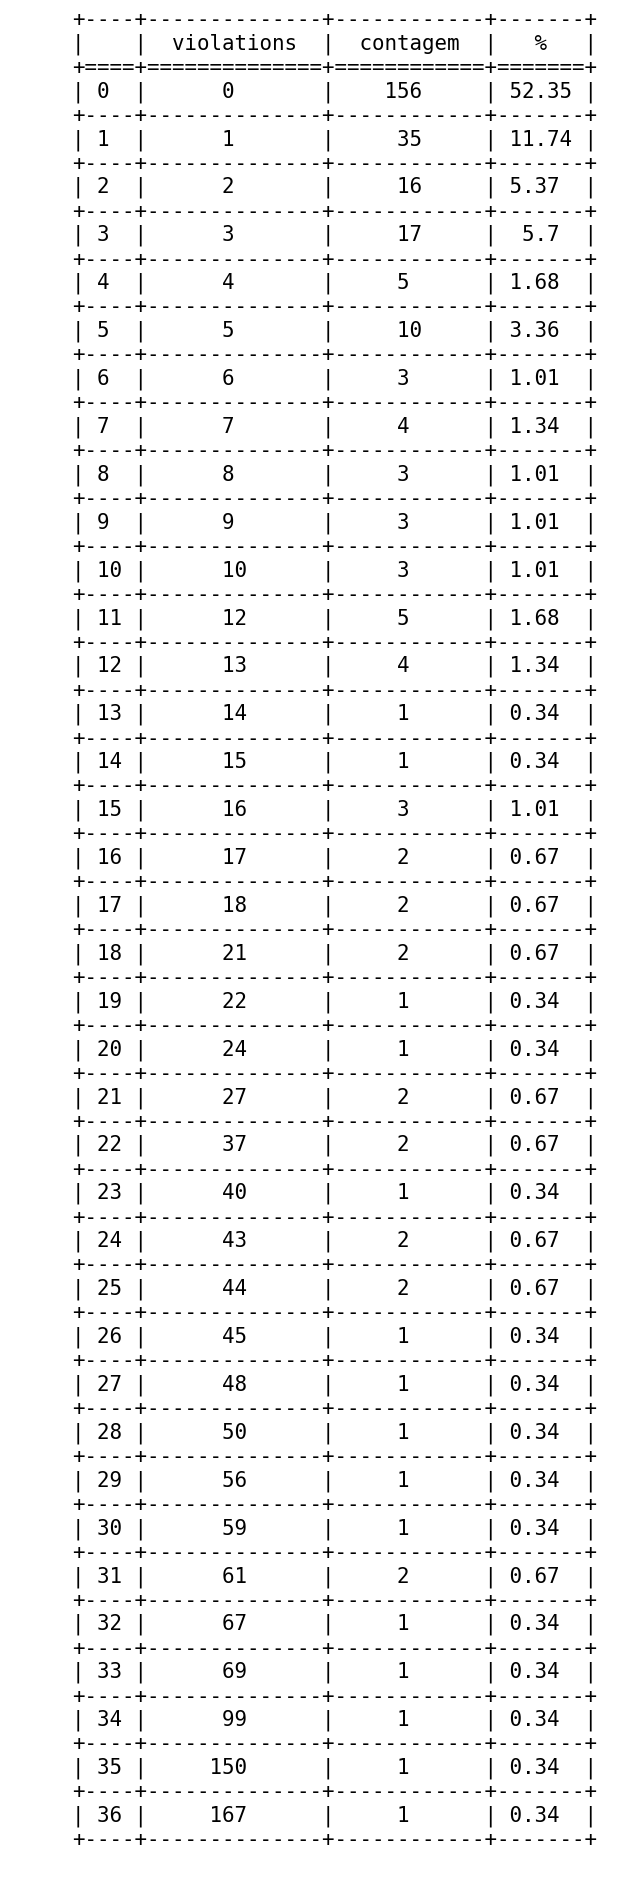

In [6]:
# Visualização da tabela de frequências da variável dependente 'violations' no ambiente Plots

table.reset_index(level=0, inplace=True)
table.rename(columns={'index': 'n'}, inplace=True)

from tabulate import tabulate
tabela = tabulate(table, headers='keys', tablefmt='grid', numalign='center')

plt.figure(figsize=(8, 3))
plt.text(0.1, 0.1, tabela, {'family': 'monospace', 'size': 15})
plt.axis('off')
plt.show()

<div style="text-align: center;">
     <strong<p align="center">DIAGNÓSTICO</po</strong>
</div>

A primeira avaliação (diagnóstico) a ser realizada ao estimar o modelo consiste em verificar a presença de superdispersão nos dados (cauda longa e consecutivamente aumento da variância) condicionada pelo comportamento de variação das variáveis preditoras sobre o comportamento da variável output.

Observação: Caso seja detectada superdispersão, o modelo de Poisson não é o mais adequado. Nesse cenário, o modelo ideal seria o Modelo de Binomial Negativo (ou Poisson Gama), uma vez que identificamos que a variância é estatisticamente superior à média.

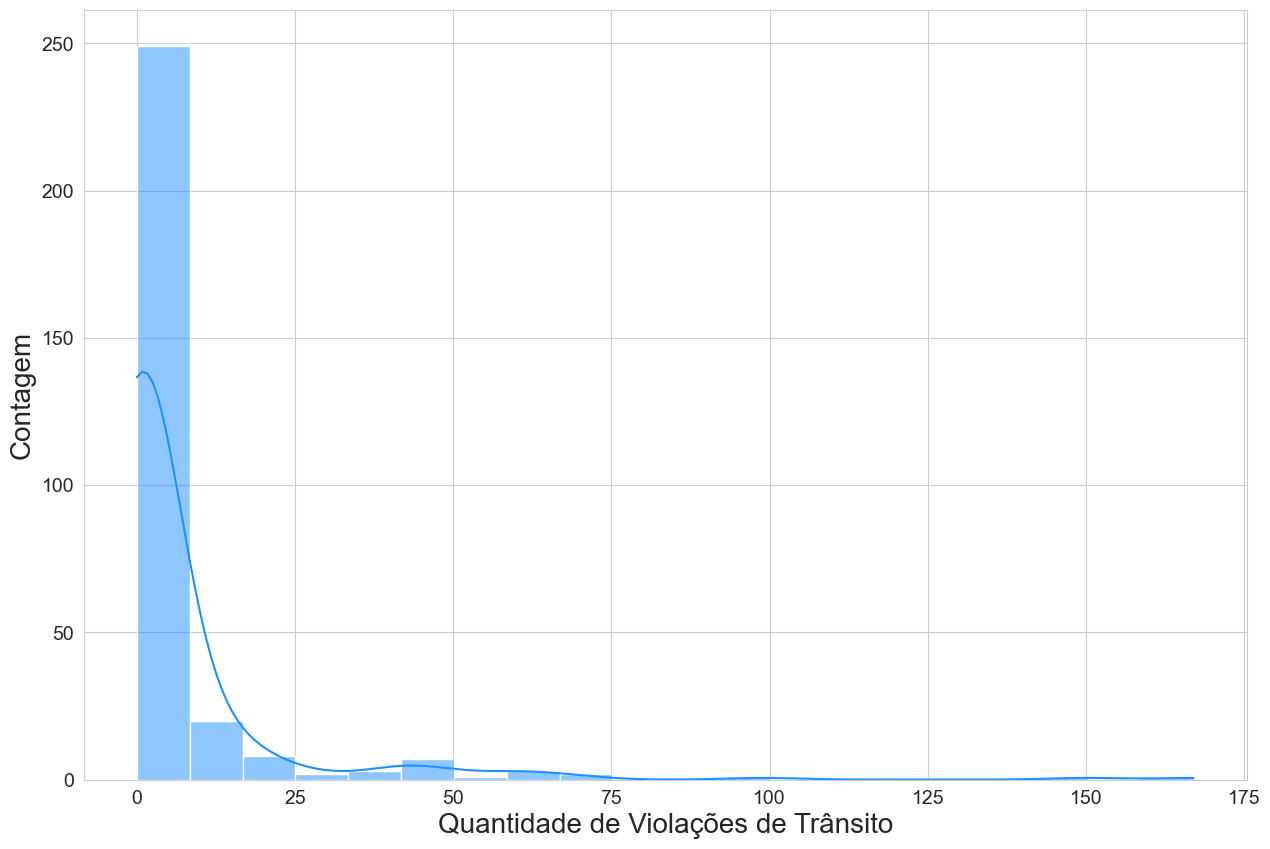

In [7]:
# Histograma da variável dependente 'violations'

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,10))
    sns.histplot(data=df_corruption, x='violations', bins=20,
                 color='dodgerblue', edgecolor='white', kde=True) # To see kernel, use kde=True
    plt.xlabel('Quantidade de Violações de Trânsito', fontsize=20)
    plt.ylabel('Contagem', fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

Analisando o gráfico anterior, identifica-se a presença de cauda longa, indicando superdispersão. No entanto, vamos examinar os resultados numéricos para confirmar o diagnóstico

In [8]:
# Diagnóstico preliminar, em termos numérico, para observação de eventual igualdade entre a média e a variância da variável dependente 'violations'

pd.DataFrame({'Média':[df_corruption.violations.mean()],
              'Variância':[df_corruption.violations.var()]})

,Média,Variância
0,6.496644,331.617834


Os resultados numéricos mostram que a variância é muito superior à média, confirmando a superdispersão nos dados. Vamos estender o diagnóstico, atribuindo um intervalo àquilo que é considerado estatisticamente igual e àquilo que é considerado muito superior.

In [9]:
import pandas as pd

# Cálculo da média e variância
media = df_corruption.violations.mean()
variancia = df_corruption.violations.var()

# Definindo um intervalo de tolerância de ±5%
tolerancia = 0.05 * media
intervalo_min = media - tolerancia
intervalo_max = media + tolerancia

# Verificação e impressão da mensagem apropriada
if intervalo_min <= variancia <= intervalo_max:
    print(f"A variância ({variancia:.2f}) é estatisticamente igual à média ({media:.2f}). Portanto, o melhor modelo de estimação é Poisson.")
else:
    print(f"A variância ({variancia:.2f}) é muito superior à média ({media:.2f}). Portanto, o melhor modelo de estimação é Poisson Negativo.")

A variância (331.62) é muito superior à média (6.50). Portanto, o melhor modelo de estimação é Poisson Negativo.


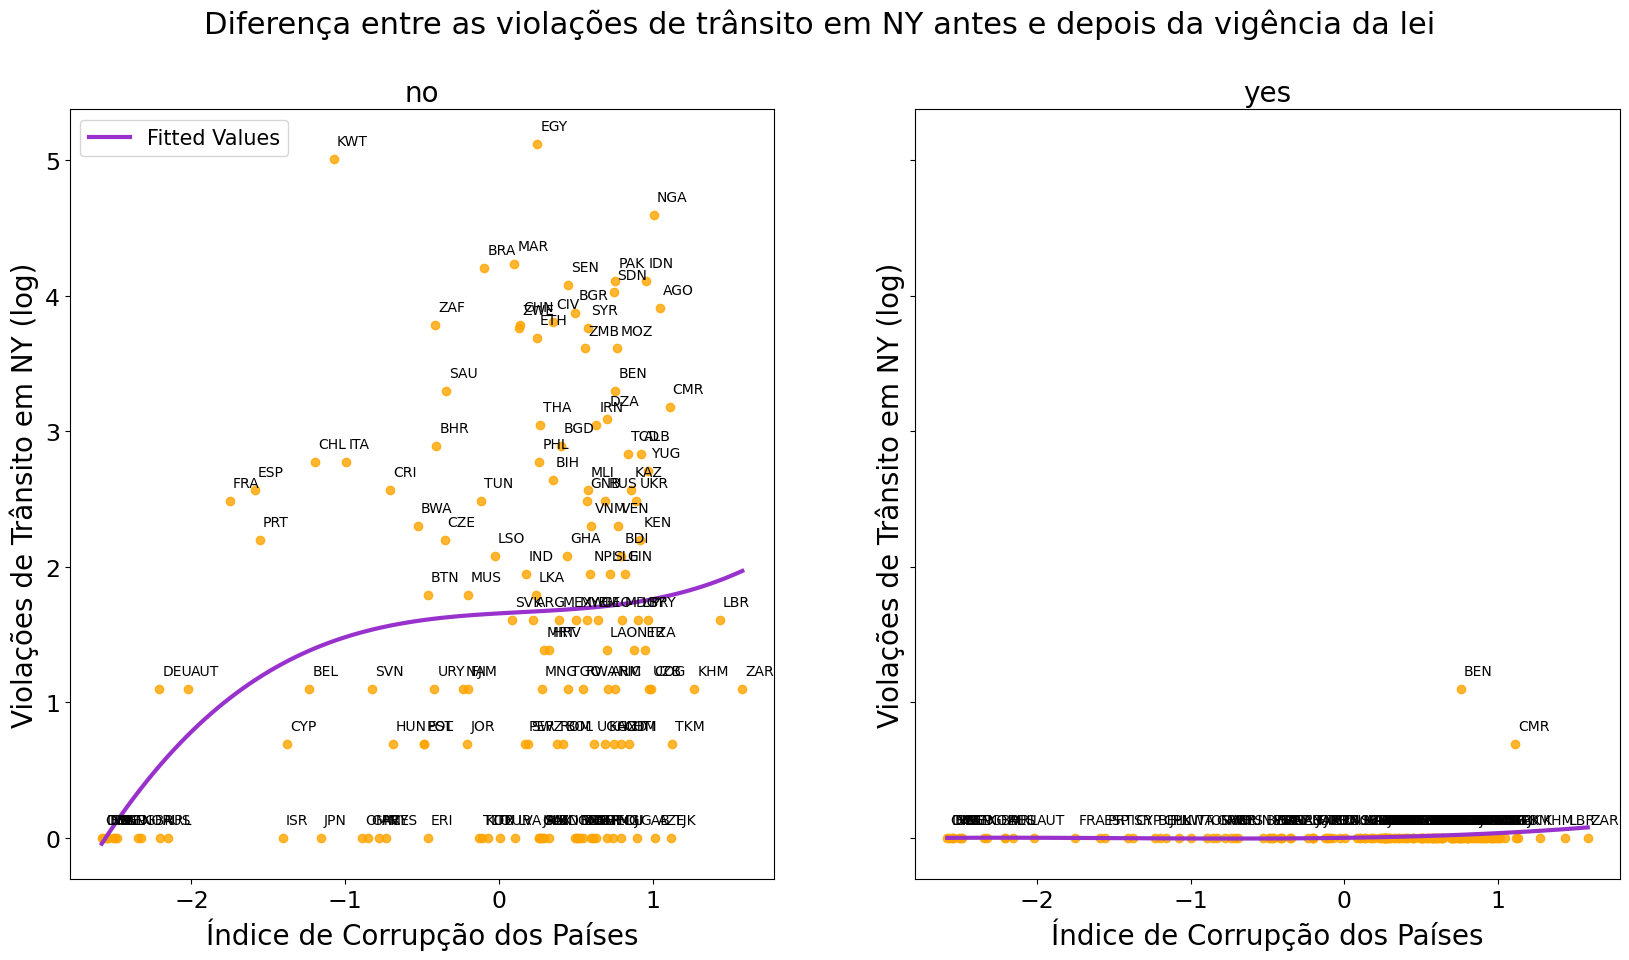

In [10]:
# Comportamento das variáveis 'corruption' e 'violations' antes e depois do início da vigência da lei

fig, axs = plt.subplots(ncols=2, figsize=(20,10), sharey=True)

fig.suptitle('Diferença entre as violações de trânsito em NY antes e depois da vigência da lei',
             fontsize=22)

post = ['no', 'yes']

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.1, str(point['val']))

for i, v in enumerate(post):
    df = df_corruption[df_corruption.post==v]
    df['violations'] = np.log(df.violations)
    df.loc[df['violations'] == np.inf, 'violations'] = 0
    df.loc[df['violations'] == -np.inf, 'violations'] = 0
    sns.regplot(data=df, x='corruption', y='violations',
                order=3, ax=axs[i], ci=False,
                line_kws={'color':'darkorchid', 'linewidth': 3,
                          'label':'Fitted Values'},
                scatter_kws={'color':'orange'})
    axs[i].set_title(v, fontsize=20)
    axs[i].set_ylabel("Violações de Trânsito em NY (log)", fontsize=20)
    axs[i].set_xlabel("Índice de Corrupção dos Países", fontsize=20)
    label_point(df.corruption, df.violations, df.code, axs[i])

for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=17)
    
axs[0].legend(loc='upper left', fontsize=15)

plt.show()


**Gráfico da esquerda**: Violações cometidas antes da vigência da lei que multa violações de trânsito.

**Gráfico da direita**: Violações cometidas após a implementação da lei que multa violações de trânsito.

**Obs**.: Observa-se que, após a lei que multa violações de trânsito entrar em vigor, o número de violações caiu drasticamente.

## <span style="font-family:Comic Sans MS; color:red">**Estimação de modelos**</span>

#### 1 - <span style="font-family:Comic Sans MS; color:yellow">**Estimação do modelo Poisson**</span>

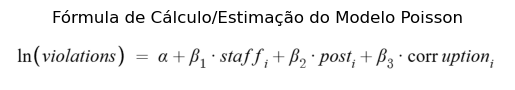

In [11]:
import matplotlib.image as mpimg

# Carregando a imagem (fórmula)
img = mpimg.imread('PoisonFormula.png')

# Mostrando a fórmula (imagem)
plt.imshow(img)
plt.axis('off')

# Adicionando label
plt.title('Fórmula de Cálculo/Estimação do Modelo Poisson')

plt.show()

In [12]:
# Estimação do modelo Poisson

# O argumento 'family=sm.families.Poisson()' da função 'smf.glm' define a estimação de um modelo Poisson

# Como a variável "post" é uma variável dicotômica (yes, no), então o próprio modelo já vai fazer a dummização. 
# Se a variável "post" não fosse uma variável dicotômica, precisariamos fazer a dummização primeiro.
# Nosso modelodelo aqui é "violations" em função de "staff", "post" e "curruption".
modelo_poisson = smf.glm(formula='violations ~ staff + post + corruption',
                         data=df_corruption,
                         family=sm.families.Poisson()).fit()

# Parâmetros do 'modelo_poisson'
modelo_poisson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             violations   No. Observations:                  298
Model:                            GLM   Df Residuals:                      294
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.8
Date:                Mon, 27 Jan 2025   Deviance:                       3644.0
Time:                        22:29:26   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2127      0.031     71.134      0.000       2.152       2.274
post[T.yes]    -4.2968      0.197    -21.762      0.000      -4.684      -3.910
staff           0.0219      0.001     17.807      0.000       0.019       0.024
corruption      0.3418      0.027     12.430      0.000       0.288       0.396
===============================================================================
"""

Do resultado acima, temos:
- Intercept (α):	2.2127
- post[T.yes]:	-4.2968
- staff:	0.0219
- corruption:	0.3418

In [14]:
# Uma outra forma mais completo de apresentar os outputs do modelo, pela função 'summary_col'

summary_col([modelo_poisson],
            model_names=["MODELO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
        })

,MODELO
Intercept,2.2127***
,(0.0311)
post[T.yes],-4.2968***
,(0.1974)
staff,0.0219***
,(0.0012)
corruption,0.3418***
,(0.0275)
N,298
Log-lik,-2071.79


##### Pergunta: Todas as variáveis preditoras se mostraram estatisticamente diferentes de zero, considerando-se um nível de significância de 5%, ceteris paribus. Porém, já se pode afirmar que a estimação Poisson é a mais adequada?
Bom, para responder essa pergunta será feito TESTE DE SUPERDISPERSÃO DE CAMERON E TRIVEDI (1990) paraA VERIFICAR SUPERDISPERSÃO NOS MODELOS POISONada?